In [1]:
import pandas as pd
import numpy as np
import os
import random

import cv2

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
! pip install opencv-python

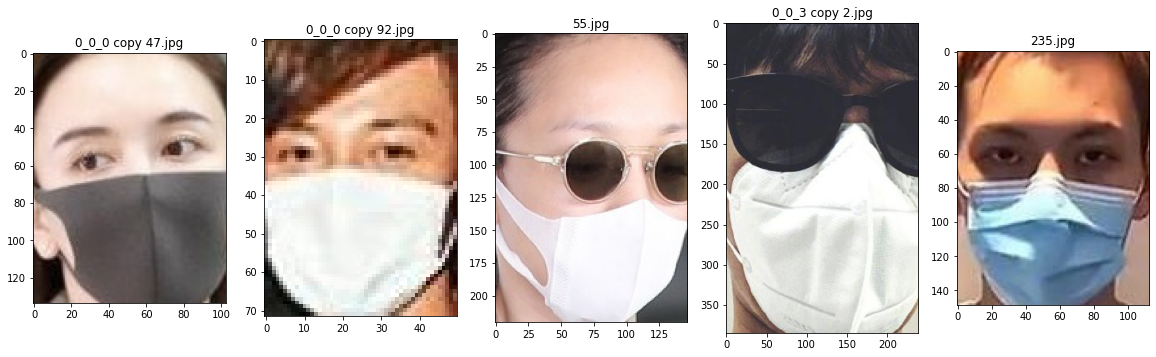

In [3]:
plt.figure(figsize=(20,20))
train_mask_folder=r'dataset/train_validate/masked/'
for i in range(5):
    file = random.choice(os.listdir(train_mask_folder))
    image_path= os.path.join(train_mask_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

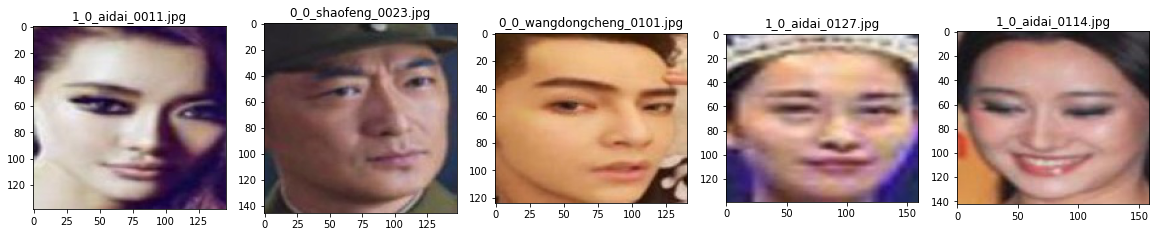

In [4]:
plt.figure(figsize=(20,20))
train_unmask_folder=r'dataset/train_validate/unmasked/'
for i in range(5):
    file = random.choice(os.listdir(train_unmask_folder))
    image_path= os.path.join(train_unmask_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [5]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'dataset/train_validate/'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [6]:
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [7]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'masked': 0, 'unmasked': 1}

In [8]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer


# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(200, 200, 3)))

# 1st conv block
model.add(Conv2D(25, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (3, 3), activation='relu', strides=(2, 2), padding='same'))
#model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
#model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
# output layer
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 25)      700       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 25)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 50)        11300     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 70)        31570     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 70)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10080)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)              

In [14]:
# Test data

test_img_folder=r'dataset/test/'
# extract the image array and class name
test_img_data, test_class_name =create_dataset(test_img_folder)

test_dict={k: v for v, k in enumerate(np.unique(test_class_name))}
test_val=  [test_dict[test_class_name[i]] for i in range(len(test_class_name))]

In [15]:
x_train=np.array(img_data, np.float32)
y_train=np.array(list(map(int,target_val)), np.float32)

x_test=np.array(test_img_data, np.float32)
y_test=np.array(list(map(int,test_val)), np.float32)

In [17]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 70 epochs

model.fit(x_train,y_train,verbose=2, epochs=70,validation_data=(x_test, y_test))

Epoch 1/70
54/54 - 2s - loss: 5.7983e-08 - accuracy: 0.4870 - val_loss: 5.9605e-08 - val_accuracy: 0.4938
Epoch 2/70
54/54 - 1s - loss: 5.7983e-08 - accuracy: 0.4870 - val_loss: 5.9605e-08 - val_accuracy: 0.4938
Epoch 3/70
54/54 - 1s - loss: 5.7983e-08 - accuracy: 0.4870 - val_loss: 5.9605e-08 - val_accuracy: 0.4938
Epoch 4/70
54/54 - 1s - loss: 5.7983e-08 - accuracy: 0.4870 - val_loss: 5.9605e-08 - val_accuracy: 0.4938
Epoch 5/70
54/54 - 1s - loss: 5.7983e-08 - accuracy: 0.4870 - val_loss: 5.9605e-08 - val_accuracy: 0.4938
Epoch 6/70
54/54 - 1s - loss: 5.7983e-08 - accuracy: 0.4870 - val_loss: 5.9605e-08 - val_accuracy: 0.4938
Epoch 7/70
54/54 - 1s - loss: 5.7983e-08 - accuracy: 0.4870 - val_loss: 5.9605e-08 - val_accuracy: 0.4938
Epoch 8/70
54/54 - 1s - loss: 5.7983e-08 - accuracy: 0.4870 - val_loss: 5.9605e-08 - val_accuracy: 0.4938
Epoch 9/70
54/54 - 1s - loss: 5.7983e-08 - accuracy: 0.4870 - val_loss: 5.9605e-08 - val_accuracy: 0.4938
Epoch 10/70
54/54 - 1s - loss: 5.7983e-08 - ac